**Кластеризация** — это задача группировки объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров, по какому-либо критерию.

# <center>K-Means</center>


In [6]:
# # инициализируем алгоритм k-means с количеством кластеров 3
# kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

* `n_clusters` — количество кластеров;
* `n_init` — количество итераций алгоритма k-means;
* `random_state` — параметр для воспроизводимости результатов от запуска к запуску.

## <center>Mini-Batch K-means</center>

Данная вариация k-means используется, когда данных очень много. Из-за их объёма вычисление центров по всей выборке занимает много времени.

Для решения этой проблемы k-means на каждом шаге работает с небольшой подвыборкой данных. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим k-means. Обычно разница в кластеризации методом Mini-Batch K-means и классическим k-means заключается в пограничных точках близко расположенных кластеров.

In [7]:
# # два кластера и подвыборки объёма 6
# kmeans = MiniBatchKMeans(n_clusters=2,random_state=42,batch_size=6)

## <center>K-means++</center>

Данную вариацию k-means используют, если признаков очень много.

Результат и время работы алгоритма зависят от изначального выбора центроидов. Чтобы минимизировать затраты, будем действовать следующим образом:

1) Первый центроид выбираем случайным образом.
2) Для каждой точки вычисляем квадрат расстояния до ближайшего центроида из тех, что уже поставлены.
3) Далее из этих точек выбираем следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния.
4) Когда все точки выбраны, реализуем k-means.

По умолчанию при запуске k-means в sklearn используется именно алгоритм k-means++. Выбор алгоритма задаётся через параметр `init`:

* `init='random'` — для классической версии k-means;
* `init='k-means++'` — для вариации k-means++.

> Остался важный вопрос: как определить количество кластеров?

**Инерция** - формула суммы квадратов всех расстояний от точек $x_i$ до центров кластеров $C_k$, к которым принадлежат данные точки.

$$J(C)=\sum_{k=1}^{K} \sum_{i \in C_{k}}\left\|x_{i}-\mu_{k}\right\|^{2} \rightarrow \min _{C}$$

> При реализации алгоритма k-means для получения значения инерции используется атрибут `inertia_`.

In [8]:
# def get_inertia(cluster_num, X):
# # инициализируем алгоритм кластеризации
#     k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# # запускаем алгоритм k-means
#     k_means.fit(X)
# # находим значение инерции
#     inertia = k_means.inertia_
# # возвращаем значение инерции
#     return inertia

Разумеется, чем меньше эта величина, тем лучше. Однако здесь есть большая проблема: минимальное значение этой функции будет достигаться тогда, когда количество кластеров будет равняться количеству объектов (т. е. каждый кластер будет состоять из одной точки и расстояния будут нулевыми). Это уже будет ситуация переобучения, так как алгоритм чересчур сильно подстроится под данные.

Для решения этой проблемы была выведена следующая эвристика: берётся такое число кластеров, начиная с которого значение функционала $J(C)$ уменьшается уже не так быстро. Формально это можно записать следующим образом:

$$D(k)=\frac{\left|J\left(C_{k}\right)-J\left(C_{k+1}\right)\right|}{\left|J\left(C_{k-1}\right)-J\left(C_{k}\right)\right|} \rightarrow \min _{k}$$

Визуально это можно представить так:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@MATHML_md10_2_11.png)

Можно увидеть, что инерция очень сильно уменьшается при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так значительно — при изменении $k$ с 3 до 4. То есть перегиб здесь находится в точке 3, и это значит, что три кластера — оптимальный вариант.

> Если в ходе решения задачи вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

Для того чтобы его вычислить, используется следующая формула:

$$s_i=\frac{(b_i-a_i)}{max(a_i,b_i)}$$

* $a_i$ — среднее расстояние от данного объекта $x_i$ до объектов из того же кластера;
* $b_i$ — среднее расстояние от данного объекта $x_i$ до объектов из другого ближайшего кластера.

Для вычисления коэффициента силуэта используется `silhouette_score`.

In [9]:
# def get_silhouette(cluster_num, X):
#     k_means =  KMeans(n_clusters=cluster_num, random_state=42)
#     k_means.fit(X)
# # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
#     silhouette = silhouette_score(X, k_means.labels_)
#     return silhouette

# silhouette = []
# for clust_num in range(2, 10):
#     silhouette.append(get_silhouette(clust_num, X))

<u>Коэффициент силуэта обладает следующими свойствами:</u>

* Значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами.

* Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной.

* Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много/мало или данные просто плохо поддаются разделению на кластеры.

Для получения итогового значения рассчитывается среднее значение силуэта для всего датасета. Соответственно, для определения оптимального количества кластеров мы будем искать самую высокую точку на графике коэффициента силуэта (ведь чем больше коэффициент, тем лучше).

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@MATHML_md10_2_12.png)

# <center>EM-алгоритм</center>

Когда данные распределены в форме вытянутых эллипсов, k-means не справляется с кластеризацией:

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/72322fbdd9951ad77a85c07760313285/asset-v1:Skillfactory+DSMED+2023+type@asset+block/MATHML_md10_3_1.png)

В таком случае в качестве альтернативы можно взять один из алгоритмов кластеризации EM (Expectation-maximization) — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в которой данные описываются законом нормального распределения.

Возьмём два случайно сгенерированных распределения Гаусса (изображены на рисунке ниже синим и жёлтым цветом).

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/b41662d3d6b1a35a19cb5299d01aa168/asset-v1:Skillfactory+DSMED+2023+type@asset+block/MATHML_md10_3_3.png)

Итак, каждая точка с какими-то вероятностями принадлежит к жёлтому и синему распределению. Теперь мы сможем использовать значения этих точек для расчёта новых математических ожиданий и дисперсий и построения новых распределений. То есть, по сути, дальше мы изменим распределения так, чтобы они максимально соответствовали точкам, которые мы к ним отнесли.

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/e2ef0540953f34679fb32c764e23c034/asset-v1:Skillfactory+DSMED+2023+type@asset+block/MATHML_md10_3_7.png)

Далее мы ещё раз повторяем описанную ранее процедуру и снова обновляем распределения. После ряда итераций окончательные распределения будут выглядеть так:

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/0022dadcc042dbd3d42a74877d4e2226/asset-v1:Skillfactory+DSMED+2023+type@asset+block/MATHML_md10_3_8.png)

Таким образом, мы смогли кластеризовать наши точки: первые четыре относятся к жёлтому кластеру, а остальные — к синему. Так и работает EM-алгоритм кластеризации.

В более общем виде последовательность действий в EM-алгоритме можно сформулировать следующим образом:

1) Выбрать количество кластеров, которое кажется нам оптимальным для наших данных.
2) Случайным образом выбрать параметры распределений в пространстве данных.
3) Для каждой точки набора данных рассчитать вероятность принадлежности к каждому кластеру (**E-шаг (expectation)** — вычисляем ожидаемый кластер для каждого объекта.).
4) Обновить параметры распределений таким образом, чтобы максимизировать вероятность принадлежности точек, отнесённых к кластеру (**M-шаг (maximization)** — оцениваем вес (априорную вероятность) и параметры распределения для каждого кластера.).
5) Повторять шаги 3-4 фиксированное число раз либо до тех пор, пока центроиды не сойдутся.

Как мы отмечали ранее, алгоритм EM очень похож на k-means и, по сути, является его упрощённым вариантом. Однако у этих алгоритмов есть различия:

* кластеры в EM эллиптические, а в k-means — сферические;

* в EM кластеризация мягкая (определяем вероятность принадлежности объекта к клластреу), а в k-means — жёсткая (определяем конкретный кластер для объекта).

Для реализации алгоритма в *sklearn* мы используем `GaussianMixture`. Для запуска алгоритма `GaussianMixture` необходимо задать следующие основные параметры:

* `n_components` — количество кластеров;
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

# <center>Практика</center>

In [10]:
import pandas as pd

df_sns = pd.read_csv('data/snsdata.csv')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [11]:
# Задание 4.1

df_sns = df_sns.iloc[:, 4:]
df_sns.shape

(30000, 36)

In [12]:
# Задание 4.2

from sklearn.preprocessing import StandardScaler

X = df_sns.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
round(X_norm[0][0], 2)

-0.33

In [13]:
# Задание 4.3

from sklearn.cluster import KMeans

model = KMeans(n_clusters=9, random_state=42)
model.fit(X_norm)
round(model.inertia_, 2)

# 857169.1?

856276.7

In [14]:
# Задание 4.4

df_sns.loc[:, 'label'] = model.labels_
df_sns.label.value_counts()

label
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

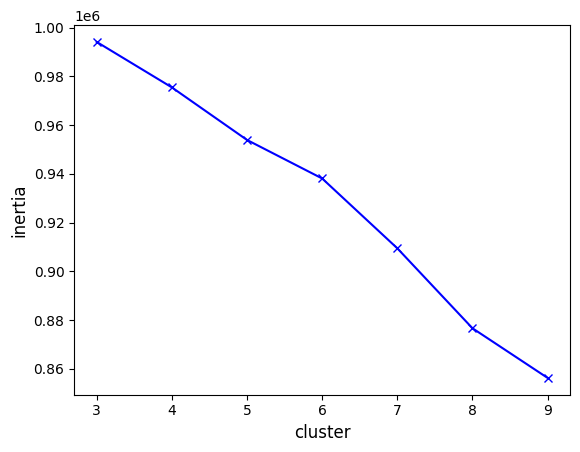

In [15]:
# Задание 4.5

# 1.

import matplotlib.pyplot as plt

def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

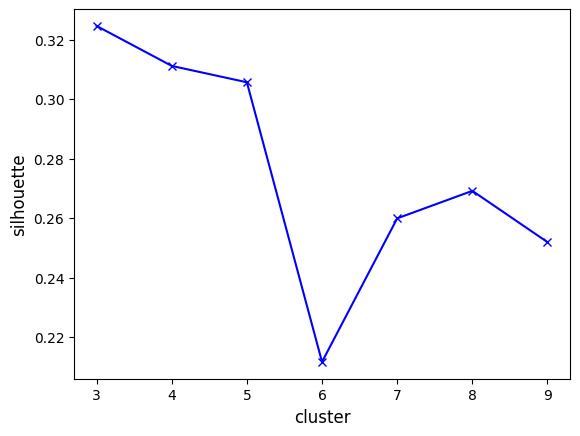

In [16]:
# 2.

from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 10):
    silhouettes.append(get_silhouette(i, X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouettes, 'xb-')

In [17]:
# Задание 4.6

top_list = []
for label, group in df_sns.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'god', 'hair'}

In [18]:
# Задание 4.7

import numpy as np
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([21744,  5219,  3037], dtype=int64))

In [19]:
# Задание 4.8

a = np.where(predictions == 2)
df_sns.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,5
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,5
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4
46,0,0,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,2
54,0,0,1,0,0,1,0,0,0,0,...,0,0,2,1,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29966,1,0,0,3,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29972,0,0,0,0,1,1,0,0,0,0,...,1,3,1,2,0,0,0,0,0,5
29979,0,3,0,0,0,0,1,0,2,1,...,1,1,0,0,0,1,1,1,1,4
29986,0,1,0,0,0,1,0,0,0,3,...,0,1,0,2,2,0,0,2,0,5


# <center>DBSCAN</center>

Этот алгоритм хорошо подходит для ситуаций, когда необходимо выделить кластеры различной, порой довольно сложной формы.

> Основная идея этого алгоритма заключается в том, что объект  принадлежит кластеру, если находится достаточно близко ко многим объектам из этого кластера.

Можно записать этот процесс в виде итеративного алгоритма:

1) Берём случайного человека.

2) Если рядом с этим человеком стоит меньше трёх других (включая его самого), считаем данного человека одиночкой.

3) Если же рядом с человеком стоит не менее трёх людей (включая его самого), тогда:
    * считаем, что этот человек находится в группе;
    * среди людей, которые находятся рядом с ним, есть те, у кого также не менее трёх соседей — добавляем их в эту же группу;
    * если среди людей, которые находятся рядом, есть те, у кого меньше трёх соседей, — это граничные элементы, и они тоже будут относиться к группе.

4) Центральные и граничные элементы определены, все остальные — одиночки (шумовые элементы).

**Алгоритм DBSCAN инициализируется двумя параметрами:**

* `eps` — расстояние, определяющее окрестности. Две точки считаются достаточно близкими, чтобы находиться в одном кластере, если расстояние между ними меньше или равно `eps`. В библиотеке *sklearn* оно по умолчанию равно 0.5.

* `min_samples` — минимальное количество точек в данных, которое может быть в кластере. В библиотеке *sklearn* оно по умолчанию равно 5.

На основании этих двух параметров точки классифицируются как **центральные** (их ещё часто называют корневыми или основными), **граничные** и **шумовые**:

* Точка является **центральной**, если в её окрестностях имеется не менее `min_samples` точек (включая саму точку). Окрестность определяется как область внутри окружности радиуса `eps`, центр которой находится в центральной точке.

* Точка является **граничной**, если она достижима из центральной точки (то есть находится в окрестности центральной точки) и количество точек в её окрестностях меньше `min_samples`.

* Точка называется **шумовой**, если она не является центральной и не достижима ни из одной из центральных точек (то есть не находится в окрестностях центральных точек).

Формирование кластеров происходит следующим образом:

* Центральная точка формирует кластер со всеми точками, достижимыми из неё.

* Шумовые точки не включаются в кластеры (не достижимые из центральных точек).

# <center>Агломеративная иерархическая кластеризация</center>

При **агломеративном** подходе кластеризации дендрограмма записывает последовательность слияний, при **дивизионном** — последовательность расщеплений.

**Агломеративный алгоритм**

* изначально каждый объект является отдельным кластером;

* на каждом шаге соединяем два самых близких кластера;

* останавливаемся, когда получаем требуемое количество кластеров или единственный кластер.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@MATHML_md10_6_2.png)

**Дивизионный (дивизивный) алгоритм**

* начинаем с ситуации, когда все объекты входят в один кластер;

* на каждом шаге разделяем один из кластеров пополам;

* останавливаемся, когда достигается необходимое количество кластеров или количество кластеров, равное числу объектов.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@MATHML_md10_6_3.png)

> Всегда ли расстояние между двумя точками рассчитывается как евклидово расстояние?

1. Евклидово расстояние

2. Расстояние городских кварталов (манхэттенское расстояние)

3. Косинусная мера близости


> Как вычислить расстояния между двумя кластерами, если хотя бы в одном из них более одного объекта? 

1. Single linkage

    **Single linkage** — метод одиночной связи (минимум попарных расстояний между точками из двух кластеров)

2. Complete linkage

    **Complete linkage** — метод полной связи (максимум попарных расстояний между точками из двух кластеров)

3. Average linkage

    **Average linkage** — метод средней связи (среднее арифметическое попарных расстояний между точками из двух кластеров)

4. Centroid linkage

    **Centroid linkage** — центроидный метод (расстояние между центроидами двух кластеров)

Для реализации алгоритма в *sklearn* вам понадобится `AgglomerativeClustering`. Обычно ему передают следующие параметры:

* `n_clusters` — количество кластеров; по умолчанию — 2.

* `linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше.

* `metric` — метод определения расстояний между точками (например, евклидово или манхэттенское).

In [20]:
import pandas as pd

df = pd.read_csv('data/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
# Задание 7.2

df.isnull().sum().sum()

314

In [22]:
# Задание 7.3

df.fillna(df.mean(numeric_only=True), inplace = True)
df['MINIMUM_PAYMENTS'].mean(numeric_only=True)

864.2065423050827

In [23]:
# Задание 7.4

from sklearn.preprocessing import StandardScaler


df.drop('CUST_ID', axis = 1, inplace = True)
X = df.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

-0.7319893664465486

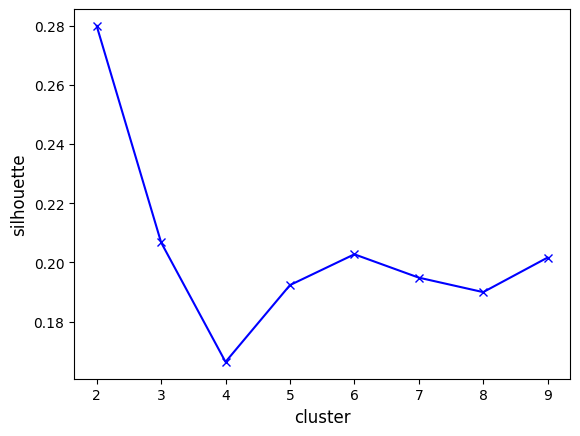

In [24]:
# Задание 7.5

def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [25]:
# Задание 7.6

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df.loc[:, 'label'] = kmeans.labels_
df.label.value_counts()

label
1    4559
2    3150
0    1241
Name: count, dtype: int64

In [26]:
# Задание 7.7

from sklearn.cluster import DBSCAN

db = DBSCAN()
db.fit(X_norm)
clusters = db.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

In [27]:
# Задание 7.8

siliuette_list_dbscan = []
 
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_norm)
        sil_score = silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


In [29]:
# Задание 7.9

from sklearn.cluster import AgglomerativeClustering

siliuette_list_hierarchical = []
 
for cluster in range(3,10,1):
        agglomerative = AgglomerativeClustering(metric='euclidean',n_clusters=cluster).fit_predict(X_norm)
        sil_score = silhouette_score(X_norm, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','number_of_clusters'])
 
 
df_hierarchical.sort_values(by = 'sil_score')

,cluster,sil_score,number_of_clusters
5,8,0.152035,8
6,9,0.153719,9
1,4,0.154709,4
4,7,0.156415,7
2,5,0.158069,5
0,3,0.173110,3
3,6,0.173356,6


In [31]:
# Задание 7.10

model = AgglomerativeClustering(metric='euclidean', n_clusters=6).fit(X_norm)
df['cluster_id'] = model.labels_
df['cluster_id'].value_counts()

cluster_id
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64

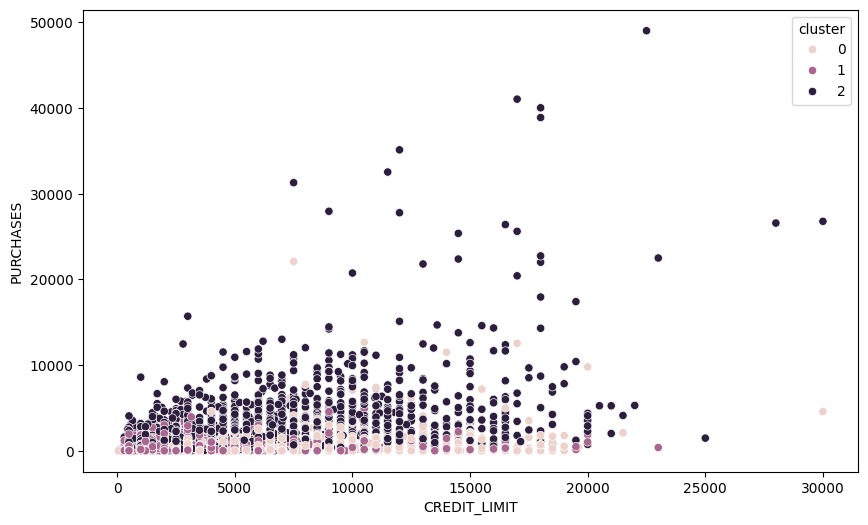

In [32]:
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()